# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_rgb, y_train = train['features'], train['labels']
X_test_rgb, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train_rgb)

# TODO: Number of testing examples.
n_test = len(X_test_rgb)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_rgb[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(y_train)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 39209


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

7


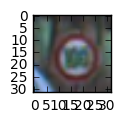

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#IB: replace later
import random
index = random.randint(0, len(X_train_rgb))
image = X_train_rgb[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])
#end IB

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

25


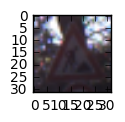

In [4]:
### Preprocess the data here.
#Shuffle the data

#IB: consider different prepocess step
from sklearn.utils import shuffle
import cv2

#Convert train and test sets from RGB to Grayscale
X_train = X_train_rgb #[cv2.cvtColor(i, cv2.COLOR_BGR2GRAY).reshape((32,32,1)) for i in X_train_rgb]
X_test = X_test_rgb #[cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) for i in X_test_rgb]

image_shape = X_train[0].shape

#shuffle training sets
X_train, y_train = shuffle(X_train, y_train)

#print sample image
index = random.randint(0, len(X_train))
gray = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(gray, cmap='gray')
print(y_train[index])
#End IB

### Feel free to use as many code cells as needed.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** Although I "plugged and played" the shuffling code from the lesson, shuffling the data is a simple straight-forward task where I did not feel the need to improve upon or rather re-invent the wheel.  However, I decided to improve the performance of the network's architecture by converting each RGB image into Grayscale since a traffic sign's color is not required to convey its meaning.  Instead, color is used only to capture the attention of a human driver.  As such, each traffic sign is uniquely distinguishable by its shape.  Such is the case when the image is of poor quality or is hidden inside a shadow or the sun's reflection which modifies its original colors.

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.

#cross-validation
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I decided to use cross-validation in order to prevent overfitting my training data by setting aside 40% of the training data.

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

# Hyperparameters
mu = 0
sigma = 0.1

def LeNetGray(x):    
    # Hyperparameters

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

def LeNet1(x):    
    # Hyperparameters

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits


def conv(layer, filter_size, in_depth, out_depth, strides = 1, padding = 'VALID', dilation_rate=None):    
    # Weight and bias
    weight = tf.Variable(tf.truncated_normal(
    [filter_size, filter_size, in_depth, out_depth], mean = mu, stddev = sigma))
    bias = tf.Variable(tf.zeros(out_depth))
    #conv_layer = tf.add(tf.matmul(conv_layer, weight), bias)

    #convolution
    if(dilation_rate == None):
        conv_layer = tf.nn.conv2d(layer, weight, strides=[1, strides, strides, 1], padding=padding)
    else:
        conv_layer = tf.nn.convolution(layer, weight, padding=padding, strides=[strides, strides], dilation_rate=dilation_rate)
                                                                                
    # Add bias
    conv_layer = tf.nn.bias_add(conv_layer, bias)

    #Activation.
    return tf.nn.relu(conv_layer)


def GoogLeNet4(x):
    #Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x3.
    conv_layer1 = conv(x, filter_size=1, in_depth=3, out_depth=3)
    
    #Layer 2: Convolutional. Input = 32x32x3. Output = 32x32x3.
    conv_layer2 = conv(x, filter_size=1, in_depth=3, out_depth=3)
    
    #Layer 2: Convolutional. Input = 32x32x3. Output = 30x30x3.
    #conv_layer2 = tf.pad(conv_layer2, [[0, 0], [3, 3], [3, 3], [0, 0]], 'CONSTANT')
    conv_layer2 = conv(conv_layer2, filter_size=3, in_depth=3, out_depth=3)#, dilation_rate=3)
    
    #Layer 3: Convolutional. Input = 32x32x3. Output = 32x32x3.
    conv_layer3 = conv(x, filter_size=1, in_depth=3, out_depth=3)
    
    #Layer 3: Convolutional. Input = 32x32x3. Output = 28x28x3.
    #conv_layer3 = tf.pad(conv_layer3, [[0, 0], [2, 2], [2, 2], [0, 0]], 'CONSTANT')
    conv_layer3 = conv(conv_layer3, filter_size=5, in_depth=3, out_depth=3)#, dilation_rate=5)
    
    #Layer 4: Convolutional. Input = 32x32x3. Output = 30x30x3.
    conv_layer4 = conv(x, filter_size=3, in_depth=3, out_depth=3)
    
    #path 4: max-pooling
    conv_layer4 = tf.nn.max_pool(conv_layer4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Layer 4: Convolutional. Input = 15x15x3. Output = 1x1x3.
    conv_layer4 = conv(conv_layer4, filter_size=1, in_depth=3, out_depth=3)
    
    #Pad each layer to 5x5: Input= 30x30x3, 28x28x3, 15x15x3, Output= 32x32x3, 32x32x3, 32x32x3
    conv_layer2 = tf.pad(conv_layer2, [[0, 0], [1, 1], [1, 1], [0, 0]], 'CONSTANT')
    conv_layer3 = tf.pad(conv_layer3, [[0, 0], [2, 2], [2, 2], [0, 0]], 'CONSTANT')
    conv_layer4 = tf.pad(conv_layer4, [[0, 0], [9, 8], [9, 8], [0, 0]], 'CONSTANT')
    
    #filter concatenation Input = 32x32x3, 32x32x3, 32x32x3, 32x32x3. Output = 32x32x12
    conv_layer = tf.concat(3, [conv_layer1, conv_layer2, conv_layer3, conv_layer4])
    
    #Input: 32x32x12 Output: 12288
    conv_layer = tf.contrib.layers.flatten(conv_layer)
    
    weight = tf.Variable(tf.truncated_normal(
    shape=(12288, n_classes), mean = mu, stddev = sigma))
    bias = tf.Variable(tf.zeros(n_classes))
    
    #Input: 900 Output:3
    logits = tf.add(tf.matmul(conv_layer, weight), bias)
    
    return logits

def GoogLeNet3(x):
    #Layer 1: Convolutional. Input = 32x32x3. Output = 1x1x32.
    conv_layer1 = conv(x, filter_size=32, in_depth=3, out_depth=256)
    
    #Layer 2: Convolutional. Input = 32x32x3. Output = 1x1x16.
    conv_layer2 = conv(x, filter_size=32, in_depth=3, out_depth=128)
    
    #Layer 2: Convolutional. Input = 1x1x16. Output = 3x3x32.
    conv_layer2 = tf.pad(conv_layer2, [[0, 0], [3, 3], [3, 3], [0, 0]], 'CONSTANT')
    conv_layer2 = conv(conv_layer2, filter_size=3, in_depth=128, out_depth=256)#, dilation_rate=3)
    
    #Layer 3: Convolutional. Input = 32x32x3. Output = 1x1x16.
    conv_layer3 = conv(x, filter_size=32, in_depth=3, out_depth=128)
    
    #Layer 3: Convolutional. Input = 1x1x16. Output = 5x5x32.
    conv_layer3 = tf.pad(conv_layer3, [[0, 0], [2, 2], [2, 2], [0, 0]], 'CONSTANT')
    conv_layer3 = conv(conv_layer3, filter_size=3, in_depth=128, out_depth=256)#, dilation_rate=5)
    
    #Layer 4: Convolutional. Input = 32x32x3. Output = 3x3x16.
    conv_layer4 = conv(x, filter_size=28, in_depth=3, out_depth=128)
    
    #path 4: max-pooling
    conv_layer4 = tf.nn.max_pool(conv_layer4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Layer 4: Convolutional. Input = 3x3x16. Output = 1x1x32.
    conv_layer4 = conv(conv_layer4, filter_size=2, in_depth=128, out_depth=256)
    
    #Pad each layer to 5x5: Input= 1x1x32, 5x5x32, 3x3x32, 3x3x32, Output= 5x5x32, 5x5x32, 5x5x32, 5x5x32
    conv_layer1 = tf.pad(conv_layer1, [[0, 0], [2, 2], [2, 2], [0, 0]], 'CONSTANT')
    conv_layer3 = tf.pad(conv_layer3, [[0, 0], [1, 1], [1, 1], [0, 0]], 'CONSTANT')
    conv_layer4 = tf.pad(conv_layer4, [[0, 0], [2, 2], [2, 2], [0, 0]], 'CONSTANT')
    
    #filter concatenation Input = 5x5x32, 5x5x32, 5x5x32, 5x5x32. Output = 5x5x128
    conv_layer = tf.concat(3, [conv_layer1, conv_layer2, conv_layer3, conv_layer4])
    
    #Input: 5x5x128 Output: 3200
    conv_layer = tf.contrib.layers.flatten(conv_layer)
    
    weight = tf.Variable(tf.truncated_normal(
    shape=(25600, n_classes), mean = mu, stddev = sigma))
    bias = tf.Variable(tf.zeros(n_classes))
    
    #Input: 1632 Output:32
    logits = tf.add(tf.matmul(conv_layer, weight), bias)
    
    return logits


def GoogLeNet2(x):
    #Layer 1: Convolutional. Input = 32x32x3. Output = 1x1x32.
    conv_layer1 = conv(x, filter_size=32, in_depth=3, out_depth=32)
    
    #Layer 2: Convolutional. Input = 32x32x3. Output = 1x1x16.
    conv_layer2 = conv(x, filter_size=32, in_depth=3, out_depth=16)
    
    #Layer 2: Convolutional. Input = 1x1x16. Output = 3x3x32.
    conv_layer2 = tf.pad(conv_layer2, [[0, 0], [3, 3], [3, 3], [0, 0]], 'CONSTANT')
    conv_layer2 = conv(conv_layer2, filter_size=3, in_depth=16, out_depth=32)#, dilation_rate=3)
    
    #Layer 3: Convolutional. Input = 32x32x3. Output = 1x1x16.
    conv_layer3 = conv(x, filter_size=32, in_depth=3, out_depth=16)
    
    #Layer 3: Convolutional. Input = 1x1x16. Output = 5x5x32.
    conv_layer3 = tf.pad(conv_layer3, [[0, 0], [2, 2], [2, 2], [0, 0]], 'CONSTANT')
    conv_layer3 = conv(conv_layer3, filter_size=3, in_depth=16, out_depth=32)#, dilation_rate=5)
    
    #Layer 4: Convolutional. Input = 32x32x3. Output = 3x3x16.
    conv_layer4 = conv(x, filter_size=28, in_depth=3, out_depth=16)
    
    #path 4: max-pooling
    conv_layer4 = tf.nn.max_pool(conv_layer4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Layer 4: Convolutional. Input = 3x3x16. Output = 1x1x32.
    conv_layer4 = conv(conv_layer4, filter_size=2, in_depth=16, out_depth=32)
    
    #Pad each layer to 5x5: Input= 1x1x32, 5x5x32, 3x3x32, 3x3x32, Output= 5x5x32, 5x5x32, 5x5x32, 5x5x32
    conv_layer1 = tf.pad(conv_layer1, [[0, 0], [2, 2], [2, 2], [0, 0]], 'CONSTANT')
    conv_layer3 = tf.pad(conv_layer3, [[0, 0], [1, 1], [1, 1], [0, 0]], 'CONSTANT')
    conv_layer4 = tf.pad(conv_layer4, [[0, 0], [2, 2], [2, 2], [0, 0]], 'CONSTANT')
    
    #filter concatenation Input = 5x5x32, 5x5x32, 5x5x32, 5x5x32. Output = 5x5x128
    conv_layer = tf.concat(3, [conv_layer1, conv_layer2, conv_layer3, conv_layer4])
    
    #Input: 5x5x128 Output: 3200
    conv_layer = tf.contrib.layers.flatten(conv_layer)
    
    weight = tf.Variable(tf.truncated_normal(
    shape=(3200, n_classes), mean = mu, stddev = sigma))
    bias = tf.Variable(tf.zeros(n_classes))
    
    #Input: 1632 Output:32
    logits = tf.add(tf.matmul(conv_layer, weight), bias)
    
    return logits

def GoogLeNet(x):
    #Layer 1: Convolutional. Input = 32x32x3. Output = 1x1x3.
    conv_layer1 = conv(x, filter_size=32, in_depth=3, out_depth=3)
    
    #Layer 2: Convolutional. Input = 32x32x3. Output = 1x1x3.
    conv_layer2 = conv(x, filter_size=32, in_depth=3, out_depth=3)
    
    #Layer 2: Convolutional. Input = 1x1x3. Output = 3x3x3.
    conv_layer2 = conv(conv_layer2, filter_size=1, in_depth=3, out_depth=3, dilation_rate=3)
    
    #Layer 3: Convolutional. Input = 32x32x3. Output = 1x1x3.
    conv_layer3 = conv(x, filter_size=32, in_depth=3, out_depth=3)
    
    #Layer 3: Convolutional. Input = 1x1x3. Output = 5x5x3.
    conv_layer3 = conv(conv_layer3, filter_size=1, in_depth=3, out_depth=3, dilation_rate=5)
    
    #Layer 4: Convolutional. Input = 32x32x3. Output = 3x3x3.
    conv_layer4 = conv(x, filter_size=29, in_depth=3, out_depth=3)
    
    #path 4: max-pooling
    conv_layer4 = tf.nn.max_pool(conv_layer4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Layer 4: Convolutional. Input = 3x3x3. Output = 1x1x3.
    conv_layer4 = conv(conv_layer4, filter_size=2, in_depth=3, out_depth=3)
    
    #filter concatenation Input = 1x1, 5x5, 3x3, 3x3. Output = (34x4, 12)
    conv_layer = tf.concat(3, [conv_layer1, conv_layer2, conv_layer3, conv_layer4])
    
    #Input: 34x4x12 Output: 1632
    conv_layer = tf.contrib.layers.flatten(conv_layer)
    
    weight = tf.Variable(tf.truncated_normal(
    [12, n_classes], mean = mu, stddev = sigma))
    bias = tf.Variable(tf.zeros(n_classes))
    
    #Input: 1632 Output:32
    logits = tf.add(tf.matmul(conv_layer, weight), bias)
    
    return logits

def LeNet(x):   
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    k_output = 6
    
    # Weight and bias
    weight = tf.Variable(tf.truncated_normal(
    [5, 5, 3, k_output], mean = mu, stddev = sigma))
    bias = tf.Variable(tf.zeros(k_output))

    conv_layer = tf.nn.conv2d(x, weight, strides=[1, 1, 1, 1], padding='VALID')
    # Add bias
    conv_layer = tf.nn.bias_add(conv_layer, bias)

    # TODO: Activation.
    conv_layer = tf.nn.relu(conv_layer)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv_layer = tf.nn.max_pool(conv_layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    k_output = 16
    
    # Weight and bias
    weight = tf.Variable(tf.truncated_normal(
    [5, 5, 6, k_output], mean = mu, stddev = sigma))
    bias = tf.Variable(tf.zeros(k_output))
    
    conv_layer = tf.nn.conv2d(conv_layer, weight, strides=[1, 1, 1, 1], padding='VALID')
    # Add bias
    conv_layer = tf.nn.bias_add(conv_layer, bias)
    
    # TODO: Activation.
    conv_layer = tf.nn.relu(conv_layer)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv_layer = tf.nn.max_pool(conv_layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    conv_layer = tf.contrib.layers.flatten(conv_layer)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    weight = tf.Variable(tf.truncated_normal(
    [400,120], mean = mu, stddev = sigma))
    bias = tf.Variable(tf.zeros(120))
    conv_layer = tf.add(tf.matmul(conv_layer, weight), bias)
    
    # TODO: Activation.
    conv_layer = tf.nn.relu(conv_layer)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    weight = tf.Variable(tf.truncated_normal(
    [120, 84], mean = mu, stddev = sigma))
    bias = tf.Variable(tf.zeros(84))
    conv_layer = tf.add(tf.matmul(conv_layer, weight), bias)
    
    # TODO: Activation.
    conv_layer = tf.nn.relu(conv_layer)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 32.
    weight = tf.Variable(tf.truncated_normal(
    [84,n_classes], mean = mu, stddev = sigma))
    bias = tf.Variable(tf.zeros(n_classes))
    
    logits = tf.add(tf.matmul(conv_layer, weight), bias)
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [7]:
### Train your model here.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.001

#logits = GoogLeNet(x)
#logits = GoogLeNet2(x)
#logits = GoogLeNet3(x)
#logits = GoogLeNet4(x)
#logits = LeNet(x)
logits = LeNet1(x)
#logits = LeNetGray(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#Evaluate
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    #saver.save(sess, '/lenet_session')
    #print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.722

EPOCH 2 ...
Validation Accuracy = 0.832

EPOCH 3 ...
Validation Accuracy = 0.887

EPOCH 4 ...
Validation Accuracy = 0.917

EPOCH 5 ...
Validation Accuracy = 0.929

EPOCH 6 ...
Validation Accuracy = 0.940

EPOCH 7 ...
Validation Accuracy = 0.936

EPOCH 8 ...
Validation Accuracy = 0.951

EPOCH 9 ...
Validation Accuracy = 0.944

EPOCH 10 ...
Validation Accuracy = 0.959



### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

<i>Optimizer:</i> I used tensorflow's <b>Adamoptimizer</b> since it's more sophisticated according to the class lesson and its online documentation than <i>GradientDescentOptimizer</i>.
<p><i>Batch size:</i> <b>128</b>; since I used my local computer to train the model, increasing the batch size would have maxed out my resources.
<p><i>Epochs:</i> <b>136</b>; the validation accuracy would peak and flatten out at this iteration count.
<p><i>Learning Rate</i>: <b>0.0001</b>; I slowed the learning in order to get more accurate results.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**  I attempted several different architectures such as Googlenet but determined this project's default Lenet architecture returned the best results.  Partly, I believe the Lenet architecture utilized less resources on my local computer and was able to complete its training in an adequate amount of time. Secondly, Googlenet, for example, is meant to run parallel convolutions for its inception architecture but I was not able to determine how to implement parallel programming in tensorflow so I will continue my research at a later time.  I won't give up so quickly!

<p>As for training my model, I followed the advice from Vincent VanHoke's lesson to "Stay Calm and first lower the learning rate" anytime the model is not returning the expected results.  I also increased the epoch from 10 to 100 and then to 200 in order to determine where it peaked.  It peaked at 136 epochs.  These configurations gave my model a validation accuracy of .987 which I felt satisfied with.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess.run(tf.global_variables_initializer())

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.000


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.